In [1]:
import numpy as np
import pandas as pd
from math import factorial
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as scps

%matplotlib inline

In [101]:
def plot_dist(x, dist, title="Distribution of x"):
    """
    Plots the distribution of the x values
    """
    pmf = dist.pmf(x)
    E_x = dist.mean()
    sns.scatterplot(x, pmf)
    plt.axvline(E_x, c='orange', label='E(x)')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Discrete distributions

## Uniform distribution: $X \sim U(a, b)$

$X$ is the random variable that takes on values between $a$ and $b$ with equal probability.

### Probability
$P(X=k)=\frac{1}{b-a+1}\;\textrm{ for } k = a, ..., b$

### Expectation
$E(X) = \frac{a+b}{2}$

### Variance
$V(X) = \frac{(b-a+1)^2 - 1}{12}$

In [102]:
a = 1
b = 6

E_x = (a + b) / 2

k = np.arange(a, b+1)
pmf = np.ones_like(k) / (b - a + 1)

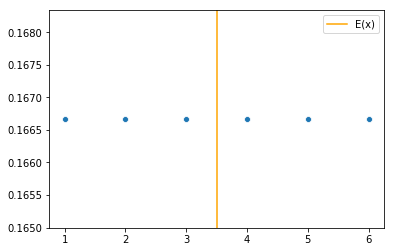

In [103]:
plt.axvline(E_x, c='orange', label='E(x)')
plt.legend()
sns.scatterplot(k, pmf);

## Binomial distribution: $X \sim B(n, p)$

$X$ is the random variable that counts the number of successes from $n$ independent attempts with the same chance for success $p$.

### Probability
$P(X=k)={n \choose k} p^k (1-p)^{n-k}\;\textrm{ for } k = 0, 1, 2, ..., n$

### Expectation
$E(X) = np$

### Variance
$V(X) = np(1-p)$

In [104]:
from scipy.stats import binom

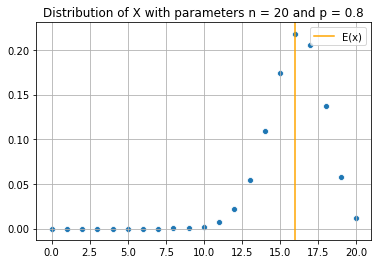

In [105]:
n = 20
p = 0.8

title = f"Distribution of X with parameters n = {n} and p = {p}"

X = np.arange(n+1)

plot_dist(X, binom(n, p), title)

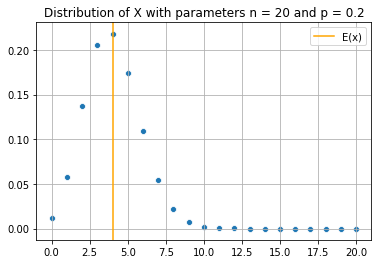

In [106]:
n = 20
p = 0.2

title = f"Distribution of X with parameters n = {n} and p = {p}"

k = np.arange(n+1)

plot_dist(k, binom(n,p), title)

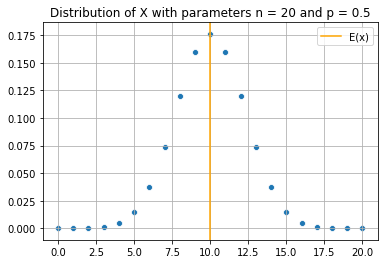

In [108]:
n = 20
p = 0.5

title = f"Distribution of X with parameters n = {n} and p = {p}"

k = np.arange(n+1)

plot_dist(k, binom(n,p), title)

## Hypergeometric distribution: $X \sim HG(M, n, N)$

$X$ is the random variable that counts the number of specials taken from choosing $N$ times without returning from a finite population of size $M$ which has $n$ specials.

### Probability
$P(X=k)=\frac{{n \choose k}{M-n \choose N-k}}{M \choose N} \;\textrm{ for } k =\textrm{max}(0,N-(M-n)),...,\textrm{min}(N, n)$

### Expectation
$E(X) = N\frac{n}{M}$

### Variance
$V(X) = \frac{M-N}{M-1}N\frac{n}{M}(1 - \frac{n}{M})$

In [15]:
M, n, N = 20, 5, 7

k_lower = max(0, N-M+n)
k_upper = min(n, N)


k = np.arange(k_lower, k_upper+1)
print('k =', k)
# D is N, and N is M
pmf = scps.hypergeom.pmf(k, M, n, N)
E_x = scps.hypergeom.mean(M, n, N)

print(E_x == (N*n/M))

k = [0 1 2 3 4 5]
True


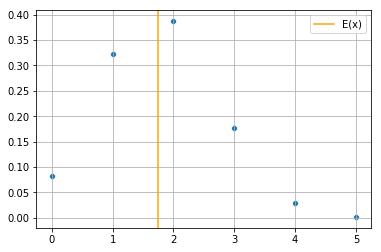

In [16]:
sns.scatterplot(k, pmf);
plt.axvline(E_x, c='orange', label='E(x)')
plt.legend()
plt.grid();

k = [ 0  1  2  3  4  5  6  7  8  9 10]
True


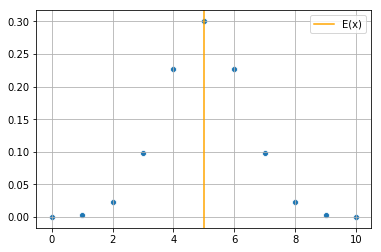

In [87]:
N, D, n = 30, 15, 10

k_lower = max(0, n + D - N)
k_upper = min(n, D)


k = np.arange(k_lower, k_upper+1)
print('k =', k)
# D is N, and N is M
pmf = scps.hypergeom.pmf(k, N, n, D, loc=0)
E_x = scps.hypergeom.mean(N, n, D)
print(E_x == (n*D/N))


sns.scatterplot(k, pmf);
plt.axvline(E_x, c='orange', label='E(x)')
plt.legend()
plt.grid();

## Geometric distribution: $X \sim G(p)$

$X$ is the random variable that counts the number of attempts up until and including the first success in an independent series of attempts with the same chance for success $p$.

### Probability
$P(X=k)=(1-p)^{k-1}p\;\textrm{ for } k = 1, 2, ...$

### Expectation
$E(X) = \frac{1}{p}$

### Variance
$V(X) = \frac{1-p}{p^2}$

## Negative binomial distribution: $X \sim NB(n,p)$

$X$ is the random variable that counts the number of attempts up until and including the $n^{th}$ success, in an independent series of attempts with the same chance for success $p$.

### Probability
$P(X=k)={k-1 \choose n-1} p^n (1-p)^{k-n} \;\textrm{ for } k = n, n+1, ...$

### Expectation
$E(X) = \frac{n}{p}$

### Variance
$V(X) = n\frac{1-p}{p^2}$

## Poisson distribution: $X \sim P(\lambda)$

$X$ is the random variable that counts the number of appearances in a unit that come at a rate of $\lambda$ per unit, independently from each other.

### Probability
$P(X=k) = e^{-\lambda}\frac{\lambda^k}{k!} \;\textrm{ for } k = n, n+1, ...$

### Expectation
$E(X) = \lambda$

### Variance
$V(X) = \lambda$